In [1]:
import os
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = {
    "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}

In [3]:
full_dataset_path = "../Dataset/SubsetVMMR"

In [4]:
stolen_cars_path = "../Dataset/Most_Stolen_Cars"

In [5]:
if os.path.exists(stolen_cars_path):
    shutil.rmtree(stolen_cars_path)
else:
    os.makedirs(stolen_cars_path)

In [6]:
for directory, car_list in cars.items():
    print("Creating ", directory)
    car_directory_name = os.path.join(stolen_cars_path, directory)
    os.makedirs(car_directory_name)
    for car in car_list:
        path = os.path.join(full_dataset_path, car, "")
        files = glob.glob(path + '*.jpg')
        for file in files:
            shutil.copy(file, car_directory_name)


Creating  honda_civic_1998
Creating  honda_accord_1997
Creating  ford_f150_2006
Creating  chevrolet_silverado_2004
Creating  toyota_camry_2014
Creating  nissan_altima_2014
Creating  toyota_corolla_2013
Creating  dodge_ram_2001
Creating  gmc_sierra_2012
Creating  chevrolet_impala_2008


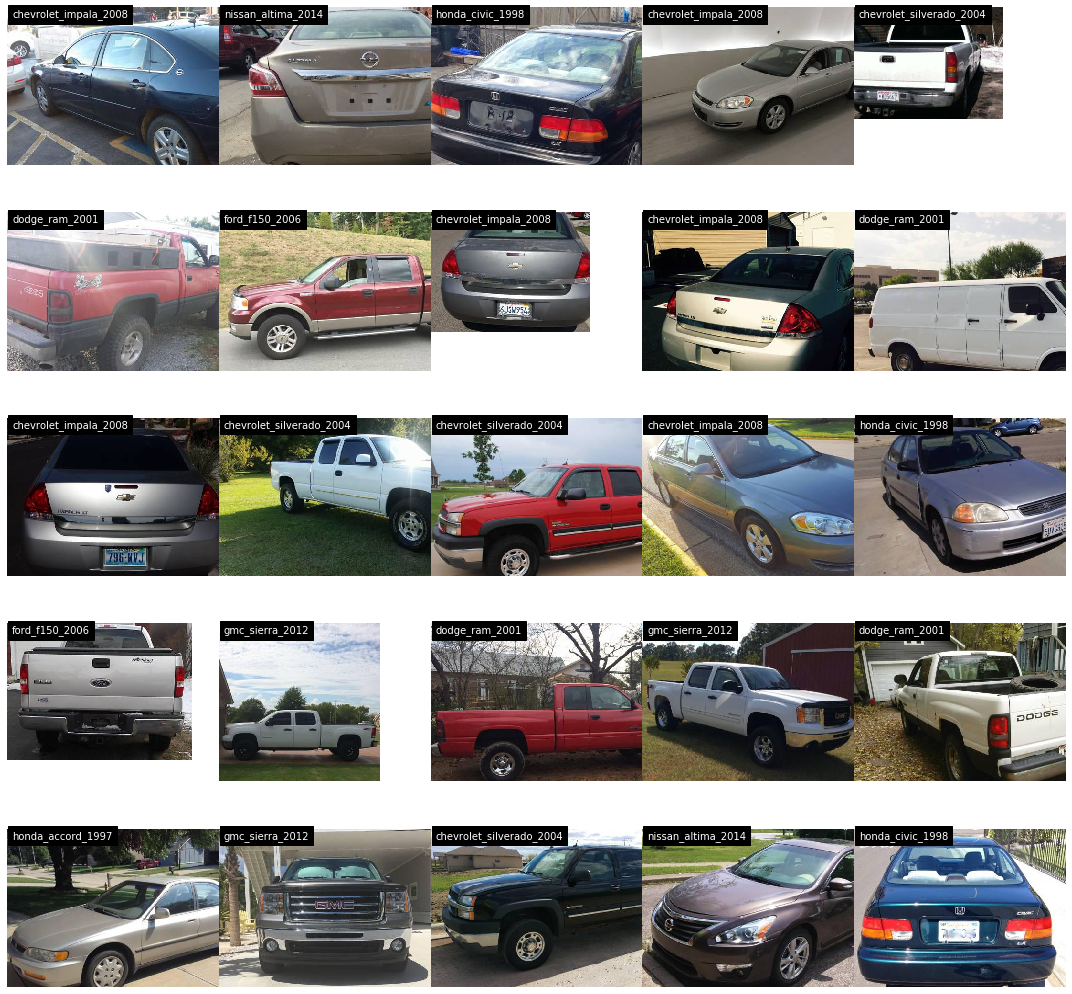

In [7]:
vmmr_utils.display_images(stolen_cars_path)

In [8]:
from multiprocessing import Pool

In [9]:
#Check Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(stolen_cars_path + "/*/*")
    pool.map(vmmr_utils.check_image, image_list)
    pool.close

print('Done.')

Done.


In [10]:
import pygal
from IPython.display import display, HTML

In [11]:
#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [13]:
def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [15]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Stolen Car Class Distribution'
for o in os.listdir(stolen_cars_path):
    line_chart.add(o, len(os.listdir(os.path.join(stolen_cars_path, o))))
galplot(line_chart)

In [18]:
#Confirm Folder Structure
for root, dirs, files in os.walk(stolen_cars_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))

        Most_Stolen_Cars/
            ...
            honda_civic_1998/
                honda_civic_1998_132.jpg
                honda_civic_1998_8.jpg
                ...
            toyota_corolla_2013/
                00f0f_4CbR9t51C2j_600x450.jpg
                2013 toyota corolla_00Z0Z_6iTRmTop8cN_600x450.jpg
                ...
            dodge_ram_2001/
                2001 Dodge Ram 1500_00J0J_7IusQZFHaXU_600x450.jpg
                2001 Dodge Ram_01313_2v4PkVGo4O_600x450.jpg
                ...
            nissan_altima_2014/
                00C0C_5cWSCs7teVX_600x450.jpg
                2014 Nissan Altima_00101_l2nLj8mHeFW_600x450.jpg
                ...
            gmc_sierra_2012/
                gmc_sierra_2007_18.jpg
                2010 gmc 1500 sierra_01515_cBf97UAv23d_600x450.jpg
                ...
            toyota_camry_2014/
                00z0z_2edeXGZiIuk_600x450.jpg
                2012 Toyota Camry SE_00707_jKusRK9xHOJ_600x450.jpg
                ...
       

In [19]:
import math
import re
import sys

In [20]:
#Train and Test Set Variables
train_val_test_ratio = (.7,.1,.2) #70/10/20 Data Split
test_folder = '../Dataset/test/'
train_folder = '../Dataset/train/'
val_folder = '../Dataset/val/'

file_names = os.listdir('../Dataset/Most_Stolen_Cars')

In [21]:
#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

In [22]:
#Remake Category Folders in both Train and Test folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

In [33]:
#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(stolen_cars_path + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s \n' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")

Moving 568 train images to category folder honda_civic_1998
Moving 81 validation images to category folder honda_civic_1998
Moving 163 test images to category folder honda_civic_1998 

Moving 199 train images to category folder toyota_corolla_2013
Moving 28 validation images to category folder toyota_corolla_2013
Moving 58 test images to category folder toyota_corolla_2013 

Moving 349 train images to category folder dodge_ram_2001
Moving 49 validation images to category folder dodge_ram_2001
Moving 101 test images to category folder dodge_ram_2001 

Moving 239 train images to category folder nissan_altima_2014
Moving 34 validation images to category folder nissan_altima_2014
Moving 69 test images to category folder nissan_altima_2014 

Moving 298 train images to category folder gmc_sierra_2012
Moving 42 validation images to category folder gmc_sierra_2012
Moving 87 test images to category folder gmc_sierra_2012 

Moving 230 train images to category folder toyota_camry_2014
Moving 33 v

In [34]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [35]:
#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.3, 
                             vertical_flip=True,
                             horizontal_flip=True, 
                             fill_mode="nearest")

In [37]:
#Load example image
file_list = glob.glob("../Dataset/test/*/*")
img_path = random.choice(file_list)
img = load_img(img_path)
#car_class = img_path.split("/")[1]train_ratio
#plt.imshow(img)
#plt.axis("off")
#plt.title("Original " + car_class, fontsize=16)


In [39]:
img_path

'../Dataset/test/chevrolet_impala_2008/2009 Chevy Impala_00n0n_iBxd99VhQmn_600x450.jpg'

In [45]:
img_path.split("/")[3]

'chevrolet_impala_2008'

Text(0.5, 1.0, 'Original chevrolet_impala_2008')

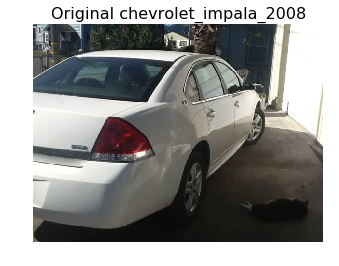

In [47]:
car_class = img_path.split("/")[3]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

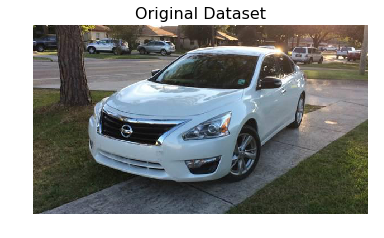

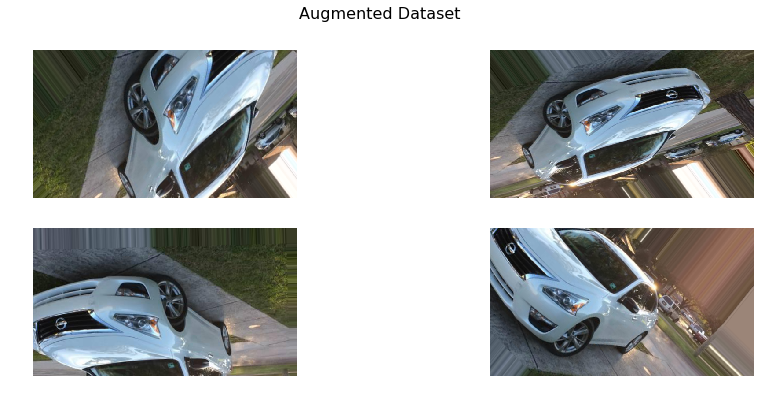

In [50]:
#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.3, 
                             vertical_flip=True,
                             horizontal_flip=True, 
                             fill_mode="nearest")
#Load example image
file_list = glob.glob("../Dataset/test/*/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)
#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, #Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented " + car_class, fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented " + car_class, fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break


In [51]:
#Oversampling Minority Classes in Training Set
def data_augmentation(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(rotation_range=45,
        horizontal_flip=True,
        fill_mode="nearest")
    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)
        
        batch = datagen.flow(img,
            batch_size=1,
            seed=21,
            save_to_dir=data_dir,
            save_prefix=img_name.split(".jpg")[0] + "augmented",
            save_format="jpg")
        
        batch.next()

classes_to_augment = [
    "toyota_camry_2014",
    "nissan_altima_2014",
    "toyota_corolla_2013",
    "gmc_sierra_2012"]

for class_names in classes_to_augment:
    print("Currently Augmenting: ", class_names)
    data_dir = os.path.join(train_folder, class_names)
    data_augmentation(data_dir)

Currently Augmenting:  toyota_camry_2014
Currently Augmenting:  nissan_altima_2014
Currently Augmenting:  toyota_corolla_2013
Currently Augmenting:  gmc_sierra_2012


In [52]:
from functools import partial

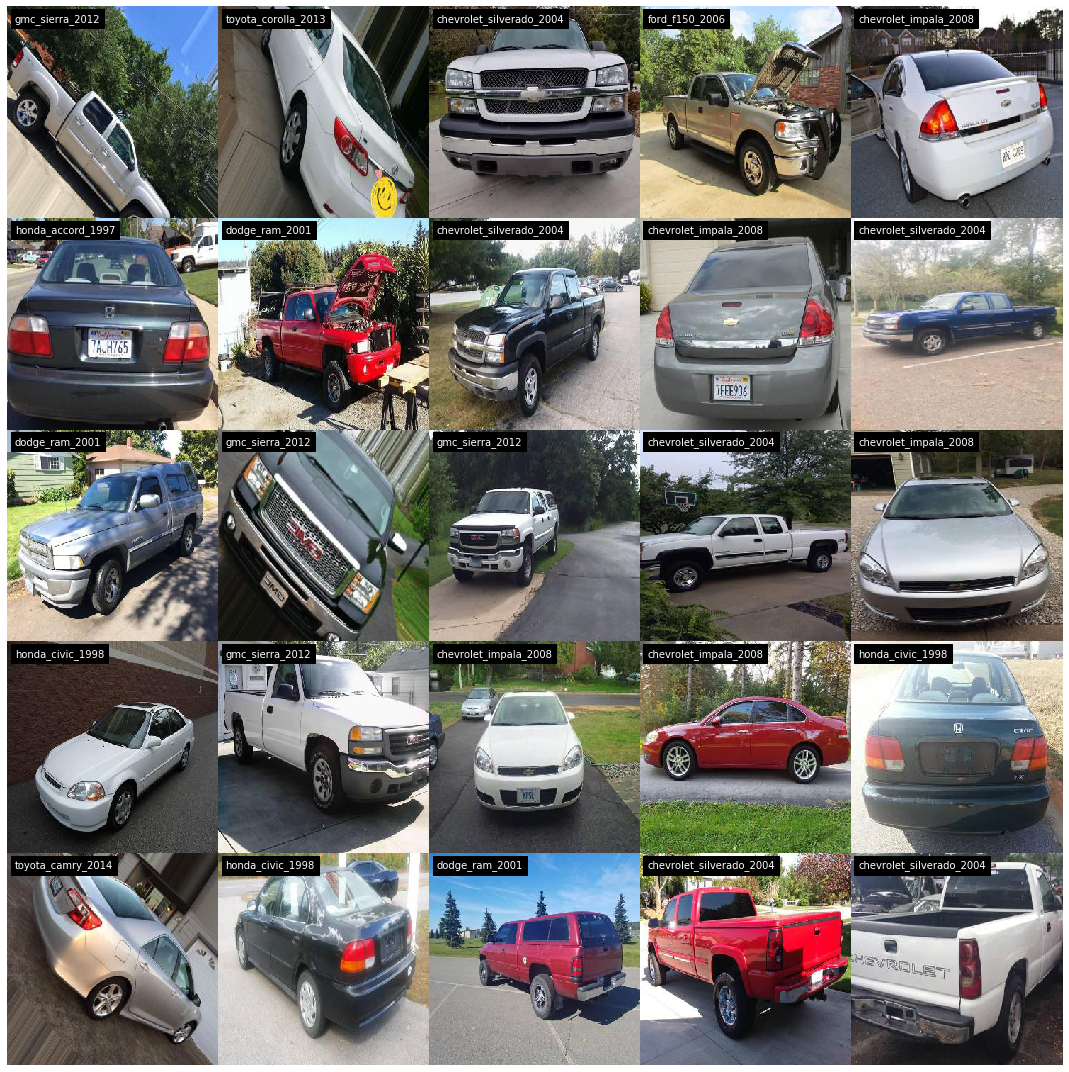

In [53]:
#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=299)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

In [54]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Most Stolen Car Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)